In [ ]:

# prompt: 마운트

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


#매칭시킨 학습데이터 가져오기

In [ ]:
import pandas as pd
#df=pd.read_csv('df.csv')
df=pd.read_csv('/content/drive/MyDrive/kdt/gain/unzip_feed/df_claim_label.csv')
df

,Unnamed: 0.1,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,wordcount,discourse_Emotion,claim_label
0,0,0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...","Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67,negative,Claim
1,1,1,9704a709b505,"Hi, i'm Isaac, i'm going to be writing about h...","On my perspective, I think that the face is a ...",Position,Adequate,41,positive,Claim
2,2,2,c22adee811b6,"Hi, i'm Isaac, i'm going to be writing about h...",I think that the face is a natural landform be...,Claim,Adequate,21,positive,Claim
3,3,3,a10d361e54e4,"Hi, i'm Isaac, i'm going to be writing about h...","If life was on Mars, we would know by now. The...",Evidence,Adequate,72,negative,Claim
4,4,4,db3e453ec4e2,"Hi, i'm Isaac, i'm going to be writing about h...",People thought that the face was formed by ali...,Counterclaim,Adequate,18,negative,Not Claim
...,...,...,...,...,...,...,...,...,...,...
30298,30298,36757,74c58fcc7ef8,Some school offer distence learning as a optio...,you cant work or cant study after school with ...,Evidence,Adequate,10,positive,Not Claim
30299,30299,36759,f7bb19f23dcd,Some school offer distence learning as a optio...,in the end you cant take the class because is ...,Counterclaim,Adequate,67,negative,Not Claim
30300,30300,36760,9f63b687e76a,Some people may ask multiple people for advice...,For many people they don't like only asking on...,Claim,Adequate,21,positive,Not Claim
30301,30301,36761,9d5bd7d86212,Some people may ask multiple people for advice...,also people have different views and opinions ...,Claim,Adequate,9,negative,Not Claim


In [ ]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,wordcount,discourse_Emotion,claim_label
0,0,0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...","Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67,negative,Claim
1,1,1,9704a709b505,"Hi, i'm Isaac, i'm going to be writing about h...","On my perspective, I think that the face is a ...",Position,Adequate,41,positive,Claim
2,2,2,c22adee811b6,"Hi, i'm Isaac, i'm going to be writing about h...",I think that the face is a natural landform be...,Claim,Adequate,21,positive,Claim
3,3,3,a10d361e54e4,"Hi, i'm Isaac, i'm going to be writing about h...","If life was on Mars, we would know by now. The...",Evidence,Adequate,72,negative,Claim
4,4,4,db3e453ec4e2,"Hi, i'm Isaac, i'm going to be writing about h...",People thought that the face was formed by ali...,Counterclaim,Adequate,18,negative,Not Claim
5,5,6,fb65fe816ba3,"Hi, i'm Isaac, i'm going to be writing about h...","It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate,37,negative,Not Claim
6,6,7,4e472e2584fa,"Hi, i'm Isaac, i'm going to be writing about h...",Everyone who thought it was made by alieans ev...,Counterclaim,Adequate,34,positive,Not Claim
7,7,8,28a94d3ee425,"Hi, i'm Isaac, i'm going to be writing about h...",Though people were not satified about how the ...,Concluding Statement,Adequate,43,positive,Not Claim
8,8,9,d226f06362f5,Limiting the usage of cars has personal and pr...,Limiting the usage of cars has personal and pr...,Lead,Effective,119,positive,Claim
9,9,10,de347c859ab6,Limiting the usage of cars has personal and pr...,With so many things in this world that few peo...,Position,Effective,41,positive,Not Claim


In [ ]:
df['discourse_type'].unique()

array(['Lead', 'Position', 'Claim', 'Evidence', 'Counterclaim',
       'Concluding Statement', 'Rebuttal'], dtype=object)

In [ ]:
df['discourse_text'].iloc[1]

"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform "

### 유사도 구하기

### 학습데이터셋에 zero-shot분석하기

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli")



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDebertaV2ForSequenceClassification: ['deberta.embeddings.position_ids']
- This IS expected if you are initializing TFDebertaV2ForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDebertaV2ForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDebertaV2ForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDebertaV2ForSequenceClassification for predictions without further training.


In [ ]:
sequence_to_classify = "On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform"
candidate_labels = ['introduction', 'Argument',
       'conclution']
output = classifier(sequence_to_classify, candidate_labels, multi_label=False)['labels'][0]
print(output)

introduction


In [ ]:
from tqdm import tqdm
sample = list(df['discourse_text'])

for i in tqdm(range(len(sample))):
  sample[i] = classifier(sequence_to_classify, candidate_labels, multi_label=False)['labels'][0]

 13%|█████████▎                                                              | 3923/30303 [4:28:50<30:03:27,  4.10s/it]

In [ ]:
df_wordcount['zoro_label']=sample
df_wordcount

In [ ]:
df_wordcount.to_csv('df_zero_label')

In [ ]:
df=df_wordcount
df

,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,wordcount,discourse_Emotion,claim_label
0,0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...","Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67,negative,Claim
1,1,9704a709b505,"Hi, i'm Isaac, i'm going to be writing about h...","On my perspective, I think that the face is a ...",Position,Adequate,41,positive,Claim
2,2,c22adee811b6,"Hi, i'm Isaac, i'm going to be writing about h...",I think that the face is a natural landform be...,Claim,Adequate,21,positive,Claim
3,3,a10d361e54e4,"Hi, i'm Isaac, i'm going to be writing about h...","If life was on Mars, we would know by now. The...",Evidence,Adequate,72,negative,Claim
4,4,db3e453ec4e2,"Hi, i'm Isaac, i'm going to be writing about h...",People thought that the face was formed by ali...,Counterclaim,Adequate,18,negative,Not Claim
...,...,...,...,...,...,...,...,...,...
30298,36757,74c58fcc7ef8,Some school offer distence learning as a optio...,you cant work or cant study after school with ...,Evidence,Adequate,10,positive,Not Claim
30299,36759,f7bb19f23dcd,Some school offer distence learning as a optio...,in the end you cant take the class because is ...,Counterclaim,Adequate,67,negative,Not Claim
30300,36760,9f63b687e76a,Some people may ask multiple people for advice...,For many people they don't like only asking on...,Claim,Adequate,21,positive,Not Claim
30301,36761,9d5bd7d86212,Some people may ask multiple people for advice...,also people have different views and opinions ...,Claim,Adequate,9,negative,Not Claim


#학습데이터에는 논증예측이 적절치못한것이 존재함

#적절하지 못한 논증은 제거

In [ ]:

print("Ineffective 컬럼 제거 전 ",df['discourse_effectiveness'].unique())

df = df.drop(df[df['discourse_effectiveness'] == 'Ineffective'].index)

print("Ineffective 컬럼 제거 후 ",df['discourse_effectiveness'].unique())


Ineffective 컬럼 제거 전  ['Adequate' 'Ineffective' 'Effective']
Ineffective 컬럼 제거 후  ['Adequate' 'Effective']


#적절하지 못한 논증을 제거

In [ ]:
print("필요없는 데이터 제거후 갯수",df.shape[0])

필요없는 데이터 제거후 갯수 30303


In [ ]:
df

,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,wordcount
0,0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...","Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67
1,1,9704a709b505,"Hi, i'm Isaac, i'm going to be writing about h...","On my perspective, I think that the face is a ...",Position,Adequate,41
2,2,c22adee811b6,"Hi, i'm Isaac, i'm going to be writing about h...",I think that the face is a natural landform be...,Claim,Adequate,21
3,3,a10d361e54e4,"Hi, i'm Isaac, i'm going to be writing about h...","If life was on Mars, we would know by now. The...",Evidence,Adequate,72
4,4,db3e453ec4e2,"Hi, i'm Isaac, i'm going to be writing about h...",People thought that the face was formed by ali...,Counterclaim,Adequate,18
...,...,...,...,...,...,...,...
36757,36757,74c58fcc7ef8,Some school offer distence learning as a optio...,you cant work or cant study after school with ...,Evidence,Adequate,10
36759,36759,f7bb19f23dcd,Some school offer distence learning as a optio...,in the end you cant take the class because is ...,Counterclaim,Adequate,67
36760,36760,9f63b687e76a,Some people may ask multiple people for advice...,For many people they don't like only asking on...,Claim,Adequate,21
36761,36761,9d5bd7d86212,Some people may ask multiple people for advice...,also people have different views and opinions ...,Claim,Adequate,9


#wordcount세기

In [ ]:
count=0
## 워드 카운트 컬럼 생성
df['wordcount']=0
##워드 카운트 계산하기
df['wordcount'] = df['discourse_text'].apply(lambda x: len(x.split()))

#문서 요약

In [ ]:
from transformers import pipeline
summarizer1 = pipeline('summarization',max_length=70, min_length=20, do_sample=False)

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:
wordcount_iqr = df['wordcount'].quantile(0.75) - df['wordcount'].quantile(0.25)
wordcount_iqr=wordcount_iqr*1.5+df['wordcount'].quantile(0.75)
print("IQR of 'wordcount' column:", wordcount_iqr)

IQR of 'wordcount' column: 120.0


In [ ]:
wordcount_iqr = df['wordcount'].quantile(0.75) - df['wordcount'].quantile(0.25)
wordcount_iqr=df['wordcount'].quantile(0.25)-wordcount_iqr*1.5
print("IQR of 'wordcount' column:", wordcount_iqr)

IQR of 'wordcount' column: -48.0


In [ ]:
df_wordcount=df[df['wordcount']>14]


In [ ]:
df=df_wordcount

In [ ]:
Evidence_detect('you cant work or cant study after school with partner')

In [ ]:
from tqdm import tqdm
sample = list(df_wordcount['discourse_text'])

for i in tqdm(range(len(sample))):
  sample[i] = Evidence_detect(sample[i])[0]['summary_text']

#wordcount이상치

In [ ]:
df['wordcount'].describe()

count    30303.000000
mean        43.783388
std         43.509495
min          1.000000
25%         15.000000
50%         27.000000
75%         57.000000
max        542.000000
Name: wordcount, dtype: float64

In [ ]:
wordcount_iqr = df['wordcount'].quantile(0.75) - df['wordcount'].quantile(0.25)
wordcount_iqr=wordcount_iqr*1.5+df['wordcount'].quantile(0.75)
print("IQR of 'wordcount' column:", wordcount_iqr)


IQR of 'wordcount' column: 120.0


In [ ]:
df_on = df[df['wordcount'] >= 120]

# Create df_under where wordcount is less than 120
df_under = df[df['wordcount'] < 120]

##2043개의 이상치데이터 문서 요약

In [ ]:

from tqdm import tqdm
sample = list(df_on['discourse_text'])

for i in tqdm(range(len(sample))):
  sample[i] = summarizer1(sample[i])[0]['summary_text']
  #sample[i] = pipe(sample[i])
  #sample[i] = sample[i][0]['label']


100%|████████████████████████████████████████████████████████████████████████████| 2043/2043 [6:21:59<00:00, 11.22s/it]


In [ ]:
df_on['discourse_text']=sample

C:\Users\OWNER\AppData\Local\Temp\ipykernel_24792\3496437381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on['discourse_text']=sample


In [ ]:
df_on

,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,wordcount
12,12,a6fcdd9110ab,Limiting the usage of cars has personal and pr...,"the day without cars in Bogota, Colombia, is a...",Evidence,Effective,172
14,14,d6807f31da92,Limiting the usage of cars has personal and pr...,car-pooling could significantly reduce emissio...,Evidence,Effective,135
48,48,96f2ff86c0f9,Students around the world are forgetting more ...,a teacher created a volcano that had to shoot ...,Evidence,Effective,128
107,107,7a19c3831933,Have you ever ever been required to do a summe...,students can create projects that will help th...,Concluding Statement,Effective,148
132,132,03205305e7bd,Students shouldn't have to participate in one ...,some students are already tired from school an...,Evidence,Effective,138
...,...,...,...,...,...,...,...
36711,36711,ea31017549c7,Going to school everyday can be difficult for ...,every student has a different life they have t...,Evidence,Effective,124
36722,36722,dc9995b62bb6,Going to school everyday can be difficult for ...,online classes will change the dynamics of edu...,Concluding Statement,Effective,215
36735,36735,39c91aae414e,"During a long day at school, have you ever tho...",if some people can't even complete homework be...,Evidence,Effective,132
36739,36739,73f18bf4f58b,"During a long day at school, have you ever tho...",school provides for most of your early life fr...,Evidence,Effective,154


In [ ]:
concatenated_df = pd.concat([df_on, df_under])
concatenated_df = concatenated_df.sort_index()
concatenated_df.head(10)

,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,wordcount
0,0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...","Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67
1,1,9704a709b505,"Hi, i'm Isaac, i'm going to be writing about h...","On my perspective, I think that the face is a ...",Position,Adequate,41
2,2,c22adee811b6,"Hi, i'm Isaac, i'm going to be writing about h...",I think that the face is a natural landform be...,Claim,Adequate,21
3,3,a10d361e54e4,"Hi, i'm Isaac, i'm going to be writing about h...","If life was on Mars, we would know by now. The...",Evidence,Adequate,72
4,4,db3e453ec4e2,"Hi, i'm Isaac, i'm going to be writing about h...",People thought that the face was formed by ali...,Counterclaim,Adequate,18
6,6,fb65fe816ba3,"Hi, i'm Isaac, i'm going to be writing about h...","It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate,37
7,7,4e472e2584fa,"Hi, i'm Isaac, i'm going to be writing about h...",Everyone who thought it was made by alieans ev...,Counterclaim,Adequate,34
8,8,28a94d3ee425,"Hi, i'm Isaac, i'm going to be writing about h...",Though people were not satified about how the ...,Concluding Statement,Adequate,43
9,9,d226f06362f5,Limiting the usage of cars has personal and pr...,Limiting the usage of cars has personal and pr...,Lead,Effective,119
10,10,de347c859ab6,Limiting the usage of cars has personal and pr...,With so many things in this world that few peo...,Position,Effective,41


#감성분석

In [ ]:
from transformers import pipeline
#
pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from tqdm import tqdm
sample2 = list(concatenated_df['discourse_text'])

for i in tqdm(range(len(sample2))):

  sample2[i] = pipe(sample2[i])
  sample2[i] = sample2[i][0]['label']


100%|██████████████████████████████████████████████████████████████████████████| 30303/30303 [2:10:07<00:00,  3.88it/s]


In [ ]:
concatenated_df['discourse_Emotion']=sample2

In [ ]:
concatenated_df

,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,wordcount,discourse_Emotion
0,0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...","Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67,negative
1,1,9704a709b505,"Hi, i'm Isaac, i'm going to be writing about h...","On my perspective, I think that the face is a ...",Position,Adequate,41,positive
2,2,c22adee811b6,"Hi, i'm Isaac, i'm going to be writing about h...",I think that the face is a natural landform be...,Claim,Adequate,21,positive
3,3,a10d361e54e4,"Hi, i'm Isaac, i'm going to be writing about h...","If life was on Mars, we would know by now. The...",Evidence,Adequate,72,negative
4,4,db3e453ec4e2,"Hi, i'm Isaac, i'm going to be writing about h...",People thought that the face was formed by ali...,Counterclaim,Adequate,18,negative
...,...,...,...,...,...,...,...,...
36757,36757,74c58fcc7ef8,Some school offer distence learning as a optio...,you cant work or cant study after school with ...,Evidence,Adequate,10,positive
36759,36759,f7bb19f23dcd,Some school offer distence learning as a optio...,in the end you cant take the class because is ...,Counterclaim,Adequate,67,negative
36760,36760,9f63b687e76a,Some people may ask multiple people for advice...,For many people they don't like only asking on...,Claim,Adequate,21,positive
36761,36761,9d5bd7d86212,Some people may ask multiple people for advice...,also people have different views and opinions ...,Claim,Adequate,9,negative


In [ ]:
df

,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,wordcount,discourse_Emotion,claim_label
0,0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...","Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67,negative,Claim
1,1,9704a709b505,"Hi, i'm Isaac, i'm going to be writing about h...","On my perspective, I think that the face is a ...",Position,Adequate,41,positive,Claim
2,2,c22adee811b6,"Hi, i'm Isaac, i'm going to be writing about h...",I think that the face is a natural landform be...,Claim,Adequate,21,positive,Claim
3,3,a10d361e54e4,"Hi, i'm Isaac, i'm going to be writing about h...","If life was on Mars, we would know by now. The...",Evidence,Adequate,72,negative,Claim
4,4,db3e453ec4e2,"Hi, i'm Isaac, i'm going to be writing about h...",People thought that the face was formed by ali...,Counterclaim,Adequate,18,negative,Not Claim
...,...,...,...,...,...,...,...,...,...
30298,36757,74c58fcc7ef8,Some school offer distence learning as a optio...,you cant work or cant study after school with ...,Evidence,Adequate,10,positive,Not Claim
30299,36759,f7bb19f23dcd,Some school offer distence learning as a optio...,in the end you cant take the class because is ...,Counterclaim,Adequate,67,negative,Not Claim
30300,36760,9f63b687e76a,Some people may ask multiple people for advice...,For many people they don't like only asking on...,Claim,Adequate,21,positive,Not Claim
30301,36761,9d5bd7d86212,Some people may ask multiple people for advice...,also people have different views and opinions ...,Claim,Adequate,9,negative,Not Claim


In [ ]:
from tqdm import tqdm
sample3 = list(concatenated_df['essay_id'])

for i in tqdm(range(len(sample3))):

  sample3[i] = pipe(sample3[i])
  sample3[i] = sample3[i][0]['label']


  0%|                                                                              | 8/30303 [00:07<7:22:00,  1.14it/s]


InvalidArgumentError: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1093), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1093), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [ ]:
concatenated_df['essay_Emotion']=sample3

# 상위 단어 추출

In [5]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
lead_df=df[df.discourse_type=='Lead']
Position_df=df[df.discourse_type=='Position']
Claim_df=df[df.discourse_type=='Claim']
Evidence_df=df[df.discourse_type=='Evidence']
Counterclaim_df=df[df.discourse_type=='Counterclaim']
Concluding_Statement_df=df[df.discourse_type=='Concluding Statement']
Rebuttal_df=df[df.discourse_type=='Rebuttal']

In [6]:
import nltk
from nltk.tokenize import word_tokenize

token_lst=[]
for text in lead_df.discourse_text:

  tokens = word_tokenize(text)
  token_lst.append(tokens)
from collections import Counter
from itertools import chain

# 리스트 안의 리스트를 평탄화
flattened_lst = list(chain.from_iterable(token_lst))

# 각 요소의 개수 세기
token_counts = Counter(flattened_lst)

# 개수에 따라 내림차순으로 정렬된 (값, 개수) 튜플 리스트
sorted_token_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
lst=[]
cnt=0
for value, count in sorted_token_counts:
    if cnt==600:
      break
    cnt=cnt+1
    lst.append(value)

In [7]:

token_lst=[]
for text in Position_df.discourse_text:

  tokens = word_tokenize(text)
  token_lst.append(tokens)


# 리스트 안의 리스트를 평탄화
flattened_lst = list(chain.from_iterable(token_lst))

# 각 요소의 개수 세기
token_counts = Counter(flattened_lst)

# 개수에 따라 내림차순으로 정렬된 (값, 개수) 튜플 리스트
sorted_token_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력

cnt=0
for value, count in sorted_token_counts:
    if cnt==600:
      break
    cnt=cnt+1
    lst.append(value)

In [8]:
import nltk
from nltk.tokenize import word_tokenize

token_lst=[]
for text in Claim_df.discourse_text:

  tokens = word_tokenize(text)
  token_lst.append(tokens)
from collections import Counter
from itertools import chain

# 리스트 안의 리스트를 평탄화
flattened_lst = list(chain.from_iterable(token_lst))

# 각 요소의 개수 세기
token_counts = Counter(flattened_lst)

# 개수에 따라 내림차순으로 정렬된 (값, 개수) 튜플 리스트
sorted_token_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
cnt=0
for value, count in sorted_token_counts:
    if cnt==600:
      break
    cnt=cnt+1
    lst.append(value)

In [9]:
import nltk
from nltk.tokenize import word_tokenize

token_lst=[]
for text in Evidence_df.discourse_text:

  tokens = word_tokenize(text)
  token_lst.append(tokens)
from collections import Counter
from itertools import chain

# 리스트 안의 리스트를 평탄화
flattened_lst = list(chain.from_iterable(token_lst))

# 각 요소의 개수 세기
token_counts = Counter(flattened_lst)

# 개수에 따라 내림차순으로 정렬된 (값, 개수) 튜플 리스트
sorted_token_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
cnt=0
for value, count in sorted_token_counts:
    if cnt==600:
      break
    cnt=cnt+1
    lst.append(value)

In [10]:
import nltk
from nltk.tokenize import word_tokenize

token_lst=[]
for text in Counterclaim_df.discourse_text:

  tokens = word_tokenize(text)
  token_lst.append(tokens)
from collections import Counter
from itertools import chain

# 리스트 안의 리스트를 평탄화
flattened_lst = list(chain.from_iterable(token_lst))

# 각 요소의 개수 세기
token_counts = Counter(flattened_lst)

# 개수에 따라 내림차순으로 정렬된 (값, 개수) 튜플 리스트
sorted_token_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
cnt=0
for value, count in sorted_token_counts:
    if cnt==600:
      break
    cnt=cnt+1
    lst.append(value)

In [11]:
import nltk
from nltk.tokenize import word_tokenize

token_lst=[]
for text in Concluding_Statement_df.discourse_text:

  tokens = word_tokenize(text)
  token_lst.append(tokens)
from collections import Counter
from itertools import chain

# 리스트 안의 리스트를 평탄화
flattened_lst = list(chain.from_iterable(token_lst))

# 각 요소의 개수 세기
token_counts = Counter(flattened_lst)

# 개수에 따라 내림차순으로 정렬된 (값, 개수) 튜플 리스트
sorted_token_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
cnt=0
for value, count in sorted_token_counts:
    if cnt==600:
      break
    cnt=cnt+1
    lst.append(value)

In [12]:
import nltk
from nltk.tokenize import word_tokenize

token_lst=[]
for text in Rebuttal_df.discourse_text:

  tokens = word_tokenize(text)
  token_lst.append(tokens)
from collections import Counter
from itertools import chain

# 리스트 안의 리스트를 평탄화
flattened_lst = list(chain.from_iterable(token_lst))

# 각 요소의 개수 세기
token_counts = Counter(flattened_lst)

# 개수에 따라 내림차순으로 정렬된 (값, 개수) 튜플 리스트
sorted_token_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력

cnt=0
for value, count in sorted_token_counts:
    if cnt==600:
      break
    cnt=cnt+1
    lst.append(value)

In [13]:
lst=list(set(lst))

In [14]:
lst

['potential',
 'popular',
 'Although',
 'C',
 'Maybe',
 'thinks',
 'me',
 'Have',
 'conferencing',
 'pros',
 'All',
 'earth',
 'mesa',
 'cant',
 'until',
 'specific',
 'formation',
 'different',
 'will',
 'feeling',
 'program',
 'three',
 'Studying',
 'teach',
 'keeping',
 'appeal',
 'choosing',
 'telling',
 'clear',
 '...',
 'Because',
 'fail',
 'letting',
 'won',
 'Face',
 'extra',
 'cars',
 'attending',
 'what',
 'known',
 'of',
 'Electoral',
 'multiple',
 'average',
 'situation',
 'Imagine',
 'whole',
 'Driverless',
 'such',
 'without',
 'creative',
 'prefer',
 'harm',
 'rest',
 'decision',
 'summer',
 'took',
 'venus',
 'selecting',
 'clean',
 'outside',
 'now',
 'common',
 'Some',
 'yes',
 'disaster',
 'pressure',
 'writing',
 'majority',
 'subject',
 'lesson',
 'than',
 'transportation',
 'These',
 'landform',
 'can',
 'time',
 'answer',
 'give',
 'story',
 'flaws',
 'trust',
 'into',
 'votes',
 'were',
 'second',
 'living',
 'win',
 "'ll",
 'People',
 'before',
 'join',
 'compu

In [15]:
for i in lst:
  df[i]=0

<ipython-input-15-fa3d8638d16b>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=0
<ipython-input-15-fa3d8638d16b>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=0
<ipython-input-15-fa3d8638d16b>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i]=0
<ipython-input-15-fa3d8638d16b>:2:

In [16]:
for word in lst:
    df[word] = df['discourse_text'].apply(lambda text: text.count(word))

#학습 시작

In [17]:
lst=['Unnamed: 0.1','discourse_id','essay_id','discourse_text']
for i in lst:
  df = df.drop(columns=i)

In [18]:
df.head()

,Unnamed: 0,discourse_type,discourse_effectiveness,wordcount,discourse_Emotion,claim_label,potential,popular,Although,C,...,completely,he,yet,seek,Making,scientists,congress,Coding,anyone,suggest
0,0,Lead,Adequate,67,negative,Claim,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
1,1,Position,Adequate,41,positive,Claim,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
2,2,Claim,Adequate,21,positive,Claim,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
3,3,Evidence,Adequate,72,negative,Claim,0,0,0,1,...,0,4,0,0,0,0,0,0,0,0
4,4,Counterclaim,Adequate,18,negative,Not Claim,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


In [20]:
df.iloc[:,6:]

,potential,popular,Although,C,Maybe,thinks,me,Have,conferencing,pros,...,completely,he,yet,seek,Making,scientists,congress,Coding,anyone,suggest
0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30299,0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,0,0
30300,0,0,0,0,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### pca적용

In [21]:
from sklearn.decomposition import PCA

# PCA 모델 초기화
pca =  PCA(n_components=997)

# 68번째부터 마지막 컬럼까지, 그리고 835번째까지의 데이터 추출
X_pca = df.iloc[:,6:]

# PCA 모델을 데이터에 fitting
pca.fit(X_pca)

# PCA를 적용한 결과를 반환
X_pca_transformed = pca.transform(X_pca)

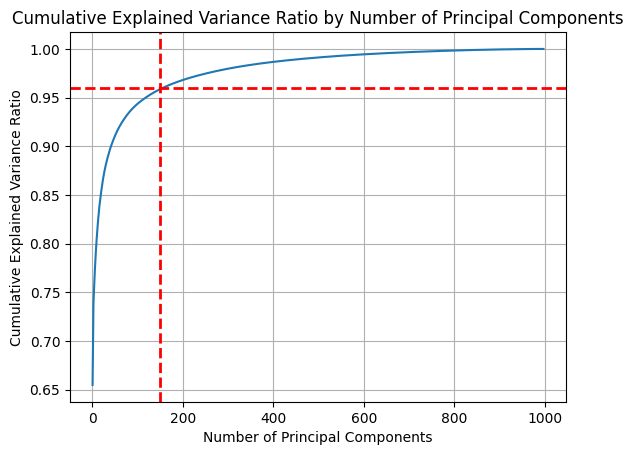

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA 모델 초기화
pca = PCA()

# 68번째부터 마지막 컬럼까지, 그리고 835번째까지의 데이터 추출
X_pca = df.iloc[:,6:]

# PCA 모델을 데이터에 fittinga
pca.fit(X_pca)

# PCA를 적용한 결과를 반환
X_pca_transformed = pca.transform(X_pca)

# PCA 주성분의 누적 설명 분산 비율 계산
explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()

# 누적 설명 분산 비율을 그래프로 표시
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, linestyle='-')
plt.axhline(0.96, linestyle='--', color='r', linewidth=2)
plt.axvline(150, linestyle='--', color='r', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

In [26]:
from sklearn.decomposition import PCA

# PCA 모델 초기화
pca =  PCA(n_components=150)

# 68번째부터 마지막 컬럼까지, 그리고 835번째까지의 데이터 추출
X_pca = df.iloc[:,6:]

# PCA 모델을 데이터에 fitting
pca.fit(X_pca)

# PCA를 적용한 결과를 반환
X_pca_transformed = pca.transform(X_pca)

In [27]:
df_pca_transformed = pd.DataFrame(X_pca_transformed)
df_pca_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,18.683631,-3.998107,-4.772917,3.909223,-1.536145,1.945665,2.456072,-1.002518,-1.909780,-2.537055,...,0.102904,-0.266102,0.034283,-0.213251,0.019788,0.363486,0.026932,0.294169,0.447761,0.250163
1,6.297493,-5.252702,-2.880835,0.183743,-1.871530,0.539268,-1.413821,1.529297,0.454216,-0.183353,...,-0.095371,-0.052052,0.042920,-0.035981,-0.065143,0.301883,0.146767,0.242857,0.123754,-0.277425
2,-6.129819,-3.778941,-0.649078,0.019129,-1.367803,1.145919,-0.642952,0.658455,0.973648,0.545650,...,-0.067174,-0.113765,0.023670,-0.042542,0.007614,0.125157,-0.206746,0.118172,-0.115709,-0.084589
3,24.283014,-4.658452,-7.013045,2.630608,-3.085798,0.025100,-2.115257,-1.097199,0.418075,-0.519760,...,0.687321,-0.357843,0.131116,0.204635,-0.479087,0.441550,0.294794,0.002588,0.128638,0.236288
4,-7.851902,-4.891790,1.402732,-0.531619,-0.981129,1.035111,-0.852503,-0.556042,0.377432,0.553441,...,0.358580,-0.069677,0.123457,-0.668347,-0.058405,-0.258069,-0.143784,0.557370,-0.216131,0.035003


In [33]:
combined_df = pd.concat([df.iloc[:, :6], df_pca_transformed], axis=1)
combined_df

,Unnamed: 0,discourse_type,discourse_effectiveness,wordcount,discourse_Emotion,claim_label,0,1,2,3,...,140,141,142,143,144,145,146,147,148,149
0,0,Lead,Adequate,67,negative,Claim,18.683631,-3.998107,-4.772917,3.909223,...,0.102904,-0.266102,0.034283,-0.213251,0.019788,0.363486,0.026932,0.294169,0.447761,0.250163
1,1,Position,Adequate,41,positive,Claim,6.297493,-5.252702,-2.880835,0.183743,...,-0.095371,-0.052052,0.042920,-0.035981,-0.065143,0.301883,0.146767,0.242857,0.123754,-0.277425
2,2,Claim,Adequate,21,positive,Claim,-6.129819,-3.778941,-0.649078,0.019129,...,-0.067174,-0.113765,0.023670,-0.042542,0.007614,0.125157,-0.206746,0.118172,-0.115709,-0.084589
3,3,Evidence,Adequate,72,negative,Claim,24.283014,-4.658452,-7.013045,2.630608,...,0.687321,-0.357843,0.131116,0.204635,-0.479087,0.441550,0.294794,0.002588,0.128638,0.236288
4,4,Counterclaim,Adequate,18,negative,Not Claim,-7.851902,-4.891790,1.402732,-0.531619,...,0.358580,-0.069677,0.123457,-0.668347,-0.058405,-0.258069,-0.143784,0.557370,-0.216131,0.035003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30298,36757,Evidence,Adequate,10,positive,Not Claim,-13.271691,-2.203077,-1.414300,0.512269,...,0.010161,0.178166,-0.026777,-0.010690,-0.025836,0.110106,-0.162360,-0.063015,0.018829,0.008362
30299,36759,Counterclaim,Adequate,67,negative,Not Claim,11.242824,-1.248489,5.217066,-0.494328,...,-0.304588,-0.314861,-0.091631,0.082616,0.875784,-0.151712,0.102960,0.012909,0.034324,-0.489117
30300,36760,Claim,Adequate,21,positive,Not Claim,-7.678931,0.609565,-1.146930,0.391131,...,-0.384180,0.087009,0.876983,0.364790,0.356316,0.059650,0.044991,-0.123879,-0.096868,-0.143204
30301,36761,Claim,Adequate,9,negative,Not Claim,-11.601113,2.010294,-2.021411,-0.748191,...,-0.154205,-0.088563,-0.138374,0.021606,-0.225165,0.039828,0.041614,0.090889,0.342039,0.082600


In [41]:
df=combined_df

In [42]:
mapping = {value: index for index, value in enumerate(df.discourse_type.unique())}

# 변환
df['discourse_type'] = df['discourse_type'].replace(mapping)

In [43]:
one_hot_encoded = pd.get_dummies(df['discourse_effectiveness'], prefix='discourse')
df=pd.concat([df,one_hot_encoded], axis=1)
df = df.drop(columns=['discourse_effectiveness'])

In [44]:
one_hot_encoded = pd.get_dummies(df['discourse_Emotion'], prefix='discourse')
df=pd.concat([df,one_hot_encoded], axis=1)
df = df.drop(columns=['discourse_Emotion'])

In [45]:
one_hot_encoded = pd.get_dummies(df['claim_label'], prefix='discourse')
df=pd.concat([df,one_hot_encoded], axis=1)
df = df.drop(columns=['claim_label'])

In [46]:
df = df.drop(columns=['Unnamed: 0'])

In [47]:
df.head()

,discourse_type,wordcount,0,1,2,3,4,5,6,7,...,147,148,149,discourse_Adequate,discourse_Effective,discourse_negative,discourse_neutral,discourse_positive,discourse_Claim,discourse_Not Claim
0,0,67,18.683631,-3.998107,-4.772917,3.909223,-1.536145,1.945665,2.456072,-1.002518,...,0.294169,0.447761,0.250163,True,False,True,False,False,True,False
1,1,41,6.297493,-5.252702,-2.880835,0.183743,-1.871530,0.539268,-1.413821,1.529297,...,0.242857,0.123754,-0.277425,True,False,False,False,True,True,False
2,2,21,-6.129819,-3.778941,-0.649078,0.019129,-1.367803,1.145919,-0.642952,0.658455,...,0.118172,-0.115709,-0.084589,True,False,False,False,True,True,False
3,3,72,24.283014,-4.658452,-7.013045,2.630608,-3.085798,0.025100,-2.115257,-1.097199,...,0.002588,0.128638,0.236288,True,False,True,False,False,True,False
4,4,18,-7.851902,-4.891790,1.402732,-0.531619,-0.981129,1.035111,-0.852503,-0.556042,...,0.557370,-0.216131,0.035003,True,False,True,False,False,False,True


In [48]:
columns_list = df.columns[1:].tolist()

In [ ]:
df.isnull().sum()

discourse_type         0
wordcount              0
claim                  0
alien                  0
idea                   0
                      ..
discourse_negative     0
discourse_neutral      0
discourse_positive     0
discourse_Claim        0
discourse_Not Claim    0
Length: 1011, dtype: int64

In [49]:
##라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

df['discourse_type'] = df['discourse_type'].astype(int)

X = df[columns_list]

y = df[['discourse_type']].values.ravel()

## 학습,테스트,트레인,테스트출력
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

##학습할 컬럼 지정
X_train_cat = X_train.loc[:, columns_list]
X_test_cat = X_test.loc[:, columns_list]

In [50]:
!pip install xgboost

In [51]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(seed=41)
models ={"XGBClassifier Classifier": xgb.XGBClassifier(seed=41) }

In [52]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
for name, model in models.items():
	kf = KFold(n_splits=5, random_state=41, shuffle=True)
	cv_results = cross_val_score(model, X_train_cat, y_train, cv=kf)
	results.append(cv_results)
 #500개는  0.6879797695690377
 #Column: argue, Average Value: 0.005922440439462662
 #Column: ?, Average Value: 0.007152101956307888
 # Column: Seeking, Average Value: 0.007834510877728462
 # Column: should, Average Value: 0.009158594533801079
 # Column: wordcount, Average Value: 0.012555768713355064
 # Column: conclusion, Average Value: 0.023079317063093185

 #600개는 0.6888872837582789
#  Column: Some, Average Value: 0.004021185450255871
#  Column: despite, Average Value: 0.004098579287528992
#  Column: benefit, Average Value: 0.004205523990094662
#  Column: ., Average Value: 0.004374821204692125
#  Column: example, Average Value: 0.004457774106413126
#  Column: argue, Average Value: 0.005450223572552204
#  Column: ?, Average Value: 0.006851424928754568
#  Column: should, Average Value: 0.007944924756884575
#  Column: wordcount, Average Value: 0.011371307075023651
#Column: conclusion, Average Value: 0.020326068624854088
	print("{} Mean Cross-Validation Accuracy Score: {}".format(name, cv_results.mean()))

XGBClassifier Classifier Mean Cross-Validation Accuracy Score: 0.6439238858408424


In [ ]:
kf = KFold(n_splits=5, random_state=41, shuffle=True)
y_train_df = pd.DataFrame(y_train, columns=['discourse_type'])
for train_index, test_index in kf.split(X_train_cat):
    X_train, X_test = X_train_cat.iloc[train_index,:], X_train_cat.iloc[test_index,:]
    y_train, y_test = y_train_df.iloc[train_index,:], y_train_df.iloc[test_index,:]

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# KFold 객체 생성
kf = KFold(n_splits=5, random_state=41, shuffle=True)

# 결과를 저장할 DataFrame 생성
result_df = pd.DataFrame(columns=X_train_cat.columns)

# 각 fold에 대해 반복
for train_index, test_index in kf.split(X_train_cat):
    X_train, X_test = X_train_cat.iloc[train_index], X_train_cat.iloc[test_index]
    y_train, y_test = y_train_df.iloc[train_index], y_train_df.iloc[test_index]

    # XGBClassifier 모델 생성 및 학습
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # 기능 중요도를 DataFrame에 추가
    result_df = pd.concat([result_df, pd.DataFrame([model.feature_importances_], columns=X_train_cat.columns)], ignore_index=True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 설정
plt.figure(figsize=(600, 120))
sns.set(style="whitegrid")

# 막대 그래프 생성
sns.barplot(data=result_df, orient='v')

# 그래프 제목과 라벨 설정
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# 그래프 표시

Text(0, 0.5, 'Features')

In [ ]:
result_df

,wordcount,people,Mona,public,fact,population,Have,Overall,thats,1976,...,driving,vehicle,self,went,live,outdated,direct,around,discourse_Adequate,discourse_Effective
0,0.011422,0.000749,0.001220,0.000734,0.000723,0.001243,0.003476,0.003532,0.001276,0.000000,...,0.000414,0.000575,0.000534,0.001271,0.000410,0.000955,0.000577,0.000819,0.003340,0.0
1,0.011528,0.000790,0.003032,0.000939,0.000735,0.000800,0.003379,0.003650,0.001187,0.000725,...,0.000806,0.000812,0.000567,0.000814,0.000672,0.001515,0.000614,0.000543,0.003498,0.0
2,0.011219,0.000735,0.000644,0.000222,0.000827,0.001164,0.003679,0.003996,0.000670,0.000576,...,0.000780,0.000405,0.000506,0.000638,0.000392,0.001032,0.000903,0.000883,0.003600,0.0
3,0.010814,0.000722,0.000000,0.000725,0.000790,0.001284,0.003045,0.004391,0.000771,0.000000,...,0.000587,0.000000,0.000522,0.000781,0.000637,0.001452,0.000748,0.000554,0.003371,0.0
4,0.011873,0.000766,0.000000,0.000634,0.000965,0.001128,0.003831,0.003350,0.000000,0.000966,...,0.000852,0.001007,0.000774,0.000332,0.000984,0.000749,0.000517,0.000859,0.003423,0.0


In [ ]:
result_df

,wordcount,people,Mona,public,fact,population,Have,Overall,thats,allowing,...,my,safe,driving,vehicle,self,live,outdated,around,discourse_Adequate,discourse_Effective
0,0.012039,0.000958,0.000000,0.000964,0.001048,0.001869,0.003409,0.004033,0.001139,0.000516,...,0.001593,0.001063,0.000689,0.000597,0.000753,0.000626,0.001369,0.001024,0.003579,0.0
1,0.012797,0.000895,0.002676,0.000960,0.000712,0.001321,0.003857,0.004374,0.001326,0.000848,...,0.001525,0.000808,0.000900,0.000864,0.000624,0.000870,0.001691,0.000889,0.003817,0.0
2,0.011963,0.000833,0.000490,0.000726,0.000979,0.001325,0.004090,0.003815,0.001054,0.000000,...,0.001804,0.000857,0.000822,0.000816,0.000745,0.000640,0.000970,0.000739,0.003848,0.0
3,0.013087,0.001010,0.000000,0.000724,0.000933,0.001996,0.003345,0.004969,0.000755,0.000000,...,0.001820,0.001067,0.000845,0.000850,0.000526,0.000759,0.001608,0.000674,0.003974,0.0
4,0.012894,0.000808,0.000000,0.000863,0.000930,0.000000,0.004094,0.003750,0.000978,0.000805,...,0.001563,0.001010,0.000884,0.000999,0.000849,0.001063,0.000793,0.001194,0.004306,0.0


In [ ]:
avg_values = result_df.mean()

# Sort the columns based on the average values
sorted_columns = avg_values.sort_values().index.tolist()

In [ ]:
sorted_columns

['discourse_Not Claim',
 '``',
 'Indefensible',
 'types',
 'planets',
 'greatly',
 'realize',
 'behind',
 'Lisa',
 'enables',
 'completely',
 'Collage',
 'principle',
 'discourse_Effective',
 'towards',
 'Everyone',
 'Secondly',
 'asked',
 'creativity',
 'single',
 'quite',
 'extremely',
 'worry',
 'aloud',
 'issues',
 "''",
 'choices',
 'muscles',
 'reduce',
 'impact',
 'seen',
 'cast',
 'run-off',
 'learned',
 'courses',
 'attending',
 'weight',
 'days',
 'candidates',
 'based',
 'longer',
 'argued',
 'established',
 'scientists',
 'family',
 'spend',
 'Having',
 'guidelines',
 'specific',
 'games',
 'works',
 'assure',
 'mandatory',
 'After',
 'atmosphere',
 'clouds',
 'cool',
 'value',
 'creating',
 'several',
 'sort',
 'non-democratic',
 'exactly',
 'experiences',
 'usually',
 'research',
 'Schools',
 'huge',
 'gives',
 'city',
 'happened',
 'trouble',
 'bullying',
 'takes',
 'computers',
 'whole',
 'coding',
 'Teachers',
 'type',
 'yourself',
 'understanding',
 'electing',
 'impr

In [ ]:
avg_values = result_df.mean()

# Sort the columns based on the average values and retrieve both column names and their corresponding average values
sorted_columns_and_values = [(col, avg_values[col]) for col in avg_values.sort_values().index]

# Print the sorted column names and their corresponding average values
print("Columns in order of average values:")
for col, avg_value in sorted_columns_and_values:
    print(f"Column: {col}, Average Value: {avg_value}")

Columns in order of average values:
Column: discourse_Not Claim, Average Value: 0.0
Column: ``, Average Value: 0.0
Column: Indefensible, Average Value: 0.0
Column: types, Average Value: 0.0
Column: planets, Average Value: 0.0
Column: greatly, Average Value: 0.0
Column: realize, Average Value: 0.0
Column: behind, Average Value: 0.0
Column: Lisa, Average Value: 0.0
Column: enables, Average Value: 0.0
Column: completely, Average Value: 0.0
Column: Collage, Average Value: 0.0
Column: principle, Average Value: 0.0
Column: discourse_Effective, Average Value: 0.0
Column: towards, Average Value: 3.429060961934738e-05
Column: Everyone, Average Value: 5.453215999295935e-05
Column: Secondly, Average Value: 6.259234214667231e-05
Column: asked, Average Value: 7.949462451506406e-05
Column: creativity, Average Value: 9.036873962031677e-05
Column: single, Average Value: 9.795171354198828e-05
Column: quite, Average Value: 0.00010565020784270018
Column: extremely, Average Value: 0.00011778981570387259
C